In [1]:
## IMPORTANT NOTE: THIS RUNS ON PYTHON 3

# This is me trying to do a very baby version of this:
# http://cs.stançford.edu/people/karpathy/reinforcejs/gridworld_td.html

import numpy as np
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [89]:
########## NECESSARY PARAMETERS ##########
#### World parameters
world_width = 7
world_length = 10
start = (3,0)
goal = (3,7)
# don't know about this one
goal_reward = 100
#### Learning parameters
gam = 0.9
# don't know about this one
max_iter = 100

In [90]:
########## CREATE ENVIRONMENT ##########

########### WIND
wind_matrix = np.zeros((world_width,world_length))

#values for each one of the columns
wind_values = (0,0,0,1,1,1,2,2,1,0)

for i in range(len(wind_values)):
    x = np.ones(world_width) * wind_values[i]
    wind_matrix[:,i] = x

##########
#reward matrix
r_matrix = np.zeros((world_width,world_length))
r_matrix[goal] = goal_reward  #this is the only info we have at the beginning
#movement matrix
m_matrix = np.chararray((world_width,world_length))
m_matrix[goal] = ('X')  #this is the only info we have at the beginning

### ¿Cómo se ve el mundo al comenzar?
Lo único que conocemos en este momento es que la posición que asignamos como "goal" tiene recompensa.
El agente no sabe esto: lo único que sabe es que tiene que encontrar un policy que maximice su valor.

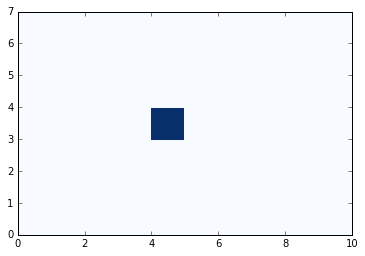

In [91]:
heatmap = plt.pcolor(r_matrix,cmap=matplotlib.cm.Blues)

In [92]:
########## DEFINING ACTORS AND ENVIRONMENT, AND HOW THEY INTERACT ##########

# Divide the world in squares and define rules about how to move - this includes the wind

class Square:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.wind = int(wind_matrix[x,y])

# Possible actions
possible_actions = [ 'N', 'E', 'S', 'W' , 'X']   #X means don't move   
              
# Convert [ N, E, S, W ] to actual coordi      
def convertAction(action):
    if(action == 'N'):
        return Square(0,1)
    elif(action == 'E'):
        return Square(1,0)
    elif(action == 'S'):
        return Square(0,-1)
    elif(action == 'W'):
        return Square(-1,0)
    else:
        return Square(0,0)

#let's see how the agent moves on the grid    
def moveAgent(from_sq,action):
    
    movement = convertAction(action) # action is a char, see convertAction

    to_sq = Square(from_sq.x + movement.x , from_sq.y + movement.y)
    
    #if it tries to leave the grid, it stays on the square where it was
    if( (to_sq.x < 0) or (to_sq.x > world_width) or (to_sq.y < 0) or (to_sq.y > world_length) ):
        moves_to = from_sq
        
    #wind can't take it out of the grid
    elif( to_sq.y + to_sq.wind > world_width):
        to_sq.y = world_width
        moves_to = to_sq
        
    #else, we sum the value of wind to the y coordinate
    else:
        to_sq.y = to_sq.y + to_sq.wind
        moves_to = to_sq
        
    return moves_to

#get max reward for all possible actions
def maxReward(state):
    all_rewards = np.zeros(len(possible_actions))
    rewards_for_index = []
    
    for i in range(len(possible_actions)):
        moved_to = moveAgent( state, possible_actions[i] )
        reward = r_matrix[moved_to.x,moved_to.y]
        all_rewards[i] = reward
        rewards_for_index.append(reward)
        
    max_reward = max(all_rewards)
    
    best_action_index = rewards_for_index.index(max_reward)
    best_action = possible_actions[best_action_index]
    
    return max_reward, best_action
        

In [93]:
# How rewards are updated
# Q(state, action) = R(state, action) + Gamma * max[Q(next state, all actions)]
def Q(state,action):
    
    if(state == goal):   #if he's at the goal, Q value doesn't update and he doesn't look for actions afterwards
        Q_value = goal_reward
        best_action = (0,0)
    
    else:
        state_Square = Square( state[0] , state[1] )
    
        max_reward,best_action = maxReward(state_Square)
    
        if r_matrix[state] == 0:
            Q_value = r_matrix[state] + gam * max_reward
        else:
            Q_value = r_matrix[state]
        
        r_matrix[state] = Q_value  #reward matrix is updated
        m_matrix[state] = best_action #same for movement matrix
    
    return Q_value


In [94]:
from_sq = Square(3,3)
moved_to = moveAgent(from_sq,'E')
print(moved_to.x)
print(moved_to.y)   #just testing to see if this works

4
4


In [95]:
for k in range(max_iter):
    for i in range(6):
        for j in range(9):
            Q( (i,j), 'N' )

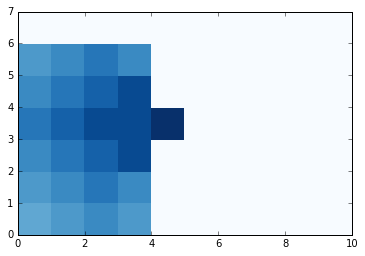

In [96]:
heatmap = plt.pcolor(r_matrix,cmap=matplotlib.cm.Blues)

In [87]:
m_matrix

chararray([[b'N', b'N', b'N', b'N', b'E', b'E', b'E', b'E', b'E', ''],
       [b'N', b'N', b'N', b'N', b'N', b'E', b'E', b'E', b'E', ''],
       [b'N', b'N', b'N', b'N', b'N', b'N', b'E', b'E', b'E', ''],
       [b'N', b'N', b'N', b'N', b'N', b'N', b'N', b'X', b'N', ''],
       [b'N', b'N', b'N', b'N', b'N', b'N', b'W', b'W', b'W', ''],
       [b'N', b'N', b'N', b'N', b'N', b'W', b'W', b'W', b'W', ''],
       ['', '', '', '', '', '', '', '', '', '']], 
      dtype='|S1')

In [88]:
Q((3,6),'N')  #just testing Q function

90.0